# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combine_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_of_mices = len(combine_data_df["Mouse ID"].unique())
num_of_mices

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

combine_data_df_test = combine_data_df

mid_timepoint_group = combine_data_df_test.groupby(['Mouse ID', 'Timepoint']).size()

mid_timepoint_group = mid_timepoint_group.reset_index(name='MID_Timepoint')

duplicate_groups = mid_timepoint_group[mid_timepoint_group ['MID_Timepoint'] > 1]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = duplicate_groups['Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
# use isin https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
combine_data_dup_mouse_id = combine_data_df[combine_data_df ['Mouse ID'].isin(duplicate_mouse_id)]
combine_data_dup_mouse_id


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# use isin https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

combine_data_unique_mouse_id = combine_data_df[~combine_data_df ['Mouse ID'].isin(duplicate_mouse_id)]
combine_data_unique_mouse_id.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
num_of_mices_no_dup = len(combine_data_unique_mouse_id["Mouse ID"].unique())
num_of_mices_no_dup

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Drug_Regimen_mean = combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

Drug_Regimen_median = combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

Drug_Regimen_var = combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

Drug_Regimen_stdv = combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

# https://www.w3schools.com/python/pandas/ref_df_sem.asp
Drug_Regimen_sem = combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

Drug_Regimen_sem

single_summary_DataFrame = pd.DataFrame({'Mean Tumor Volume': Drug_Regimen_mean, 'Median Tumor Volume': Drug_Regimen_median, 'Tumor Volume Variance': Drug_Regimen_var, 'Tumor Volume Std. Dev.': Drug_Regimen_stdv, 'Tumor Volume Std. Err.': Drug_Regimen_sem})

single_summary_DataFrame


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

## https://www.scaler.com/topics/pandas-agg/
## https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
summary_statistics = combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', sem])

summary_statistics_df = summary_statistics.rename(columns={"mean":"Mean Tumor Volume", "median":"Median Tumor Volume", "var":"Tumor Volume Variance", "std":"Tumor Volume Std. Dev.", "sem":"Tumor Volume Std. Err."})


# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

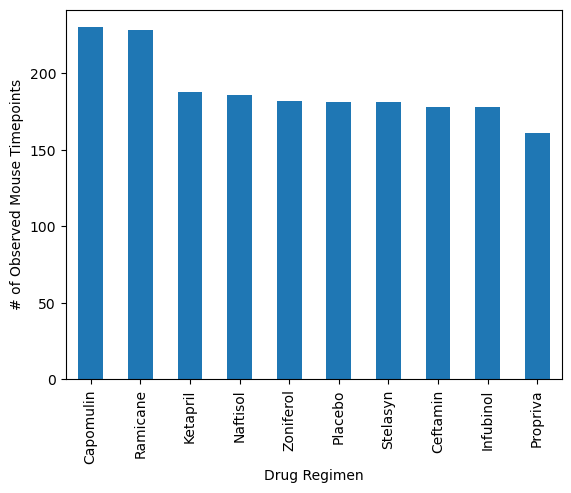

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_group = combine_data_df.groupby('Drug Regimen')

drug_regimen_count_type = drug_regimen_group['Drug Regimen'].count()

drug_regimen_count_type_desc = drug_regimen_count_type.sort_values(ascending=False)

count_chart = drug_regimen_count_type_desc.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("# of Observed Mouse Timepoints")


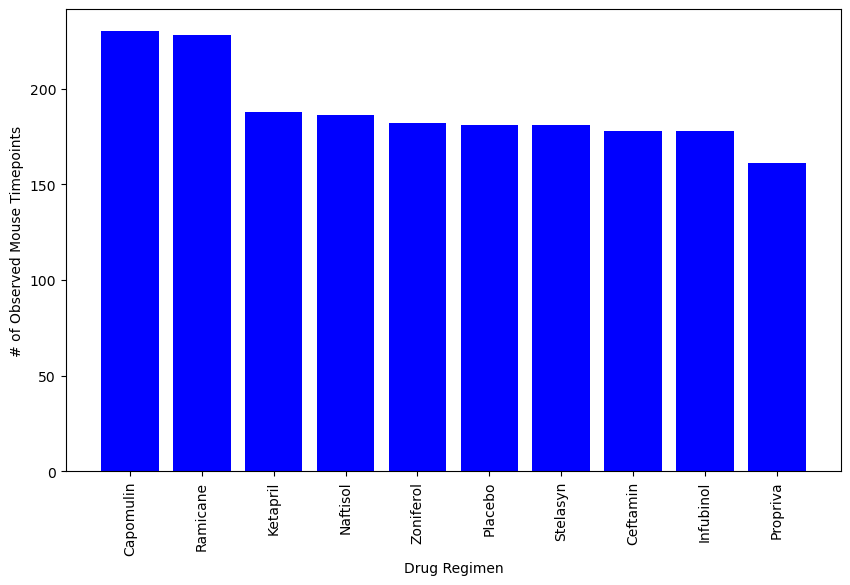

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_group = combine_data_df.groupby('Drug Regimen')

drug_regimen_count_type = drug_regimen_group['Drug Regimen'].count()

drug_regimen_count_type_desc = drug_regimen_count_type.sort_values(ascending=False)

# count_chart = drug_regimen_count_type_desc.plot(kind='bar')

drug_regimen_count_type_values = drug_regimen_count_type_desc.values
x_axis = drug_regimen_count_type_desc.index

plt.figure(figsize=(10, 6))
plt.bar(x_axis, drug_regimen_count_type_values, color='blue')

# Set the xlabel and ylabel using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotate the x axis values vertically
plt.xticks(rotation='vertical')

plt.show()

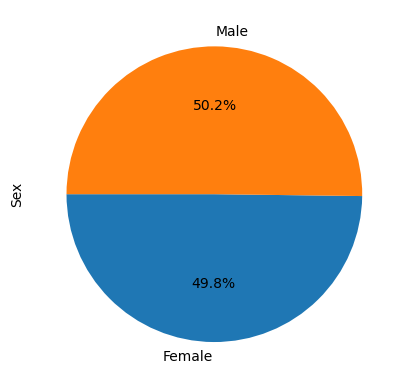

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Get the unique mouse id so that we dont calculate gender of same mouse again in the count
combine_data_unique_df = combine_data_df.drop_duplicates(subset=['Mouse ID'])
combine_data_unique_df
mice_gender_group = combine_data_unique_df.groupby('Sex')
mice_gender_group
mice_gender_group_count_type = mice_gender_group['Sex'].count()
mice_gender_group_count_type_desc = mice_gender_group_count_type.sort_values(ascending=False)

mice_gender_group_count_type_desc

count_chart = mice_gender_group_count_type.plot(kind='pie', autopct='%1.1f%%', startangle=180)


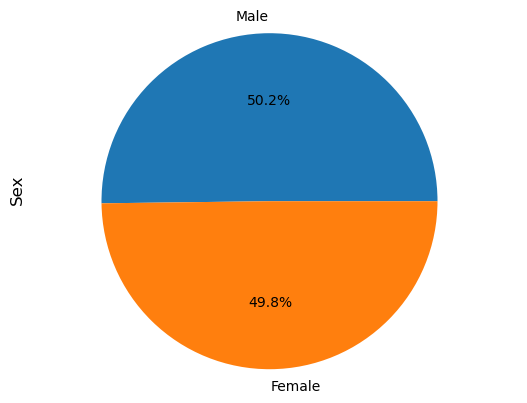

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get the unique mouse id so that we dont calculate gender of same mouse again in the count
combine_data_unique_df = combine_data_df.drop_duplicates(subset=['Mouse ID'])
combine_data_unique_df
mice_gender_group = combine_data_unique_df.groupby('Sex')
mice_gender_group
mice_gender_group_count_type = mice_gender_group['Sex'].count()
mice_gender_group_count_type_desc = mice_gender_group_count_type.sort_values(ascending=False)

mice_gender_group_count_type_desc

labels = mice_gender_group_count_type_desc.index

sizes = mice_gender_group_count_type_desc.values

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=0 )

plt.text(-1.5, 0, 'Sex', color='black', fontsize=12, ha='center', rotation='vertical')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_regimens_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

combine_data_filter_df = combine_data_df[combine_data_df['Drug Regimen'].isin(treatment_regimens_list)]
combine_data_filter_df


# Start by getting the last (greatest) timepoint for each mouse
mouse_tumor_volume = combine_data_filter_df.groupby('Mouse ID')['Tumor Volume (mm3)'].max()
mouse_tumor_volume

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


Mouse ID
a203    67.973419
a251    65.525743
a275    62.999356
a411    45.466677
a444    45.000000
          ...    
y769    68.594745
y793    45.000000
y865    64.729837
z578    45.000000
z581    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
